# Продвинутая визуализация данных. Домашнее задание №2

#### Студент: Виноградов Егор.

In [1]:
# Импортируем библиотеки, которые будем использовать в рамках работы
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Задание 1 (2 балла)  

Посмотрите на тип данных столбца с датами. Преобразуйте текущий тип данных в формат pandas.Timestamp. С помощью функционала библиотеки Pandas создайте линейные графики динамики стоимости Bitcoin и Ethereum с января 2019 года по декабрь 2021 года.

In [2]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [3]:
stock_market.columns.unique()

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

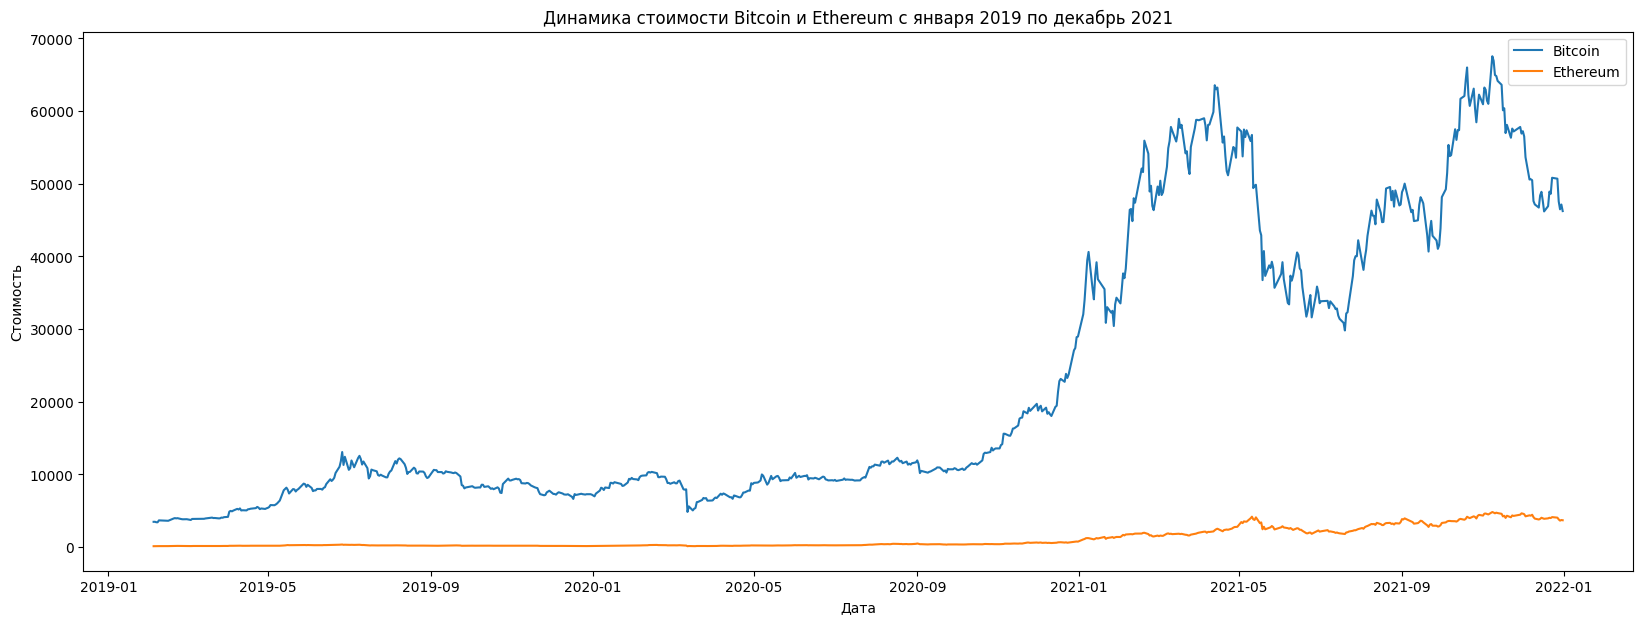

In [4]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'], dayfirst=True)
stock_market.set_index('Date', inplace=True)

stock_market['Bitcoin_Price'] = stock_market['Bitcoin_Price'].str.replace(',', '').astype(float)
stock_market['Ethereum_Price'] = stock_market['Ethereum_Price'].str.replace(',', '').astype(float)

filtered_data = stock_market.sort_index().loc['2019-01-01':'2021-12-31']

plt.figure(figsize=(20, 7))  
plt.plot(filtered_data.index, filtered_data['Bitcoin_Price'], label='Bitcoin')
plt.plot(filtered_data.index, filtered_data['Ethereum_Price'], label='Ethereum')
plt.title('Динамика стоимости Bitcoin и Ethereum с января 2019 по декабрь 2021')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()
plt.show()


# Задание 2 (2 балла)

Создайте один график, на котором будет изображена динамика цен на все полезные ископаемые в 2019–2024 гг. (Natural Gas, Crude Oil, Copper, Platinum, Gold). Цены рассчитайте относительно 4 февраля 2019 года (цены в этот день возьмите за 1, остальные рассчитайте как отношение цены в заданный день к цене 4 февраля 2019 года).

In [5]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


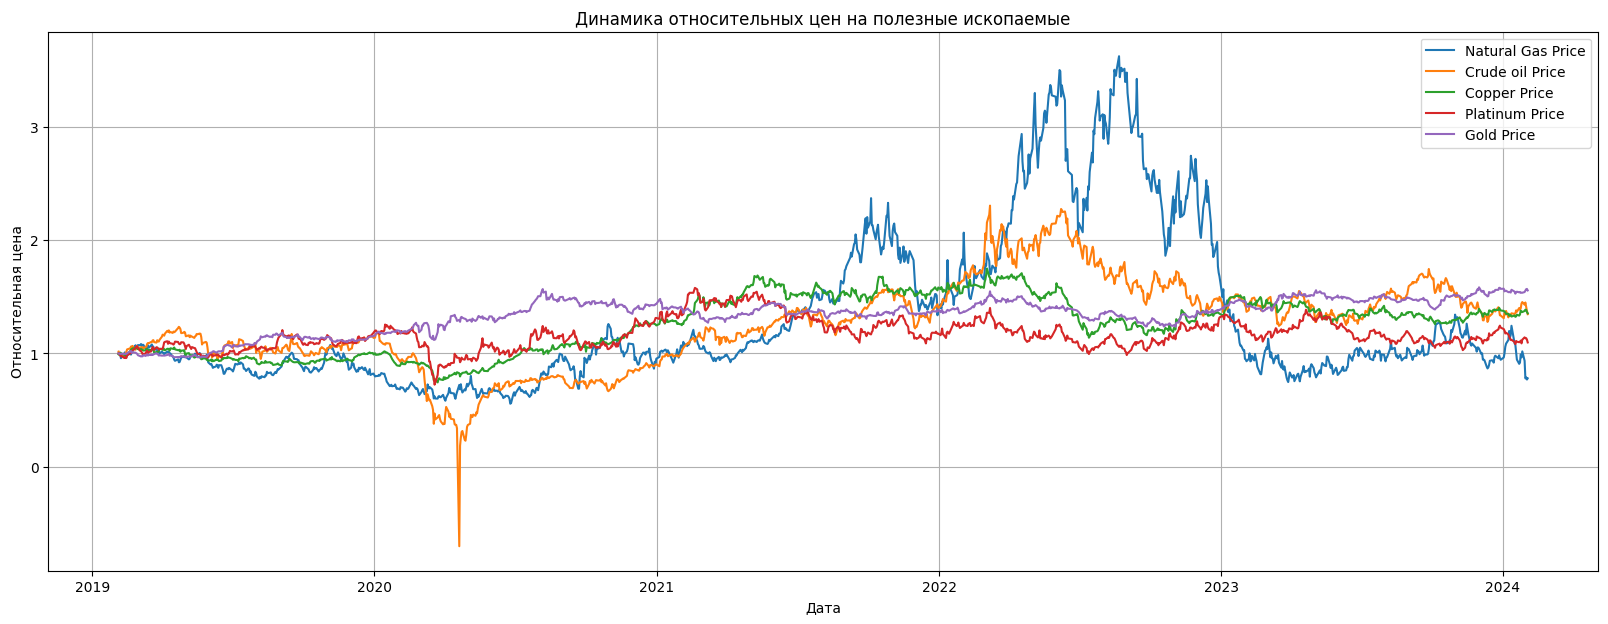

In [6]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'], dayfirst=True)
stock_market = stock_market.sort_values('Date').set_index('Date')

price_columns = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']

for col in price_columns:
    if stock_market[col].dtype == 'object':
        stock_market[col] = stock_market[col].str.replace(',', '').astype(float)

base_date = stock_market.index[stock_market.index > '2019-02-04'].min()
base_prices = stock_market.loc[base_date, price_columns]

relative_prices = stock_market[price_columns] / base_prices

plt.figure(figsize=(20, 7))
for col in price_columns:
    plt.plot(relative_prices.index, relative_prices[col], label=col.replace('_', ' '))
plt.title('Динамика относительных цен на полезные ископаемые')
plt.xlabel('Дата')
plt.ylabel('Относительная цена')
plt.legend()
plt.grid(True)
plt.show()


# Задание 3 (4 балла)  

Среди всех IT-компаний явно выделяются пять наиболее крупных. Они объединены аббревиатурой FAANG — Meta (Former Facebook), Amazon, Apple, Netflix, Google. Многие программисты мечтают попасть именно в эти компании, а инвесторы пристально следят за их деятельностью. Давайте узнаем, насколько это оправданно.

### Задание 3.1 (1 балл)

Создайте функцию, которая будет принимать на вход произвольное количество столбцов формата pandas.Series и возвращать сумму этих серий.

Подсказка: используйте инструментарий *args и **kwags.

С помощью метода .apply() создайте новый столбец FAANG, который будет представлять собой сумму стоимости акций всех компаний, входящих в это символическое объединение.

In [7]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [8]:
def sum_series(*args):
    return sum(args)

stock_market['FAANG'] = stock_market.apply(lambda row: sum_series(row['Meta_Price'], row['Apple_Price'], row['Amazon_Price'], row['Netflix_Price'], row['Google_Price']), axis=1)
print(stock_market['FAANG'].head())

0    1539.67
1    1449.59
2    1433.95
3    1461.41
4    1483.31
Name: FAANG, dtype: float64


### Задание 3.2 (1 балла)  

Аналогично заданию 3.1 рассчитайте все стоимости акций компаний относительно стоимости 4 февраля 2019 года (возьмите это значение за единицу, остальные — как соотношение).

- Создайте линейный график, на котором будут изображены все графики роста стоимости компаний (входящих в FAANG) относительно 4 февраля 2019 года.
- Нанесите на график темпы роста всего FAANG. Те компании, которые росли быстрее (большую часть времени), чем в среднем росли показатели по FAANG, покрасьте в оттенки синего, а те компании, которые росли медленнее, — в оттенки красного.
- Добавьте легенду и остальные аттрибуты.

In [9]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


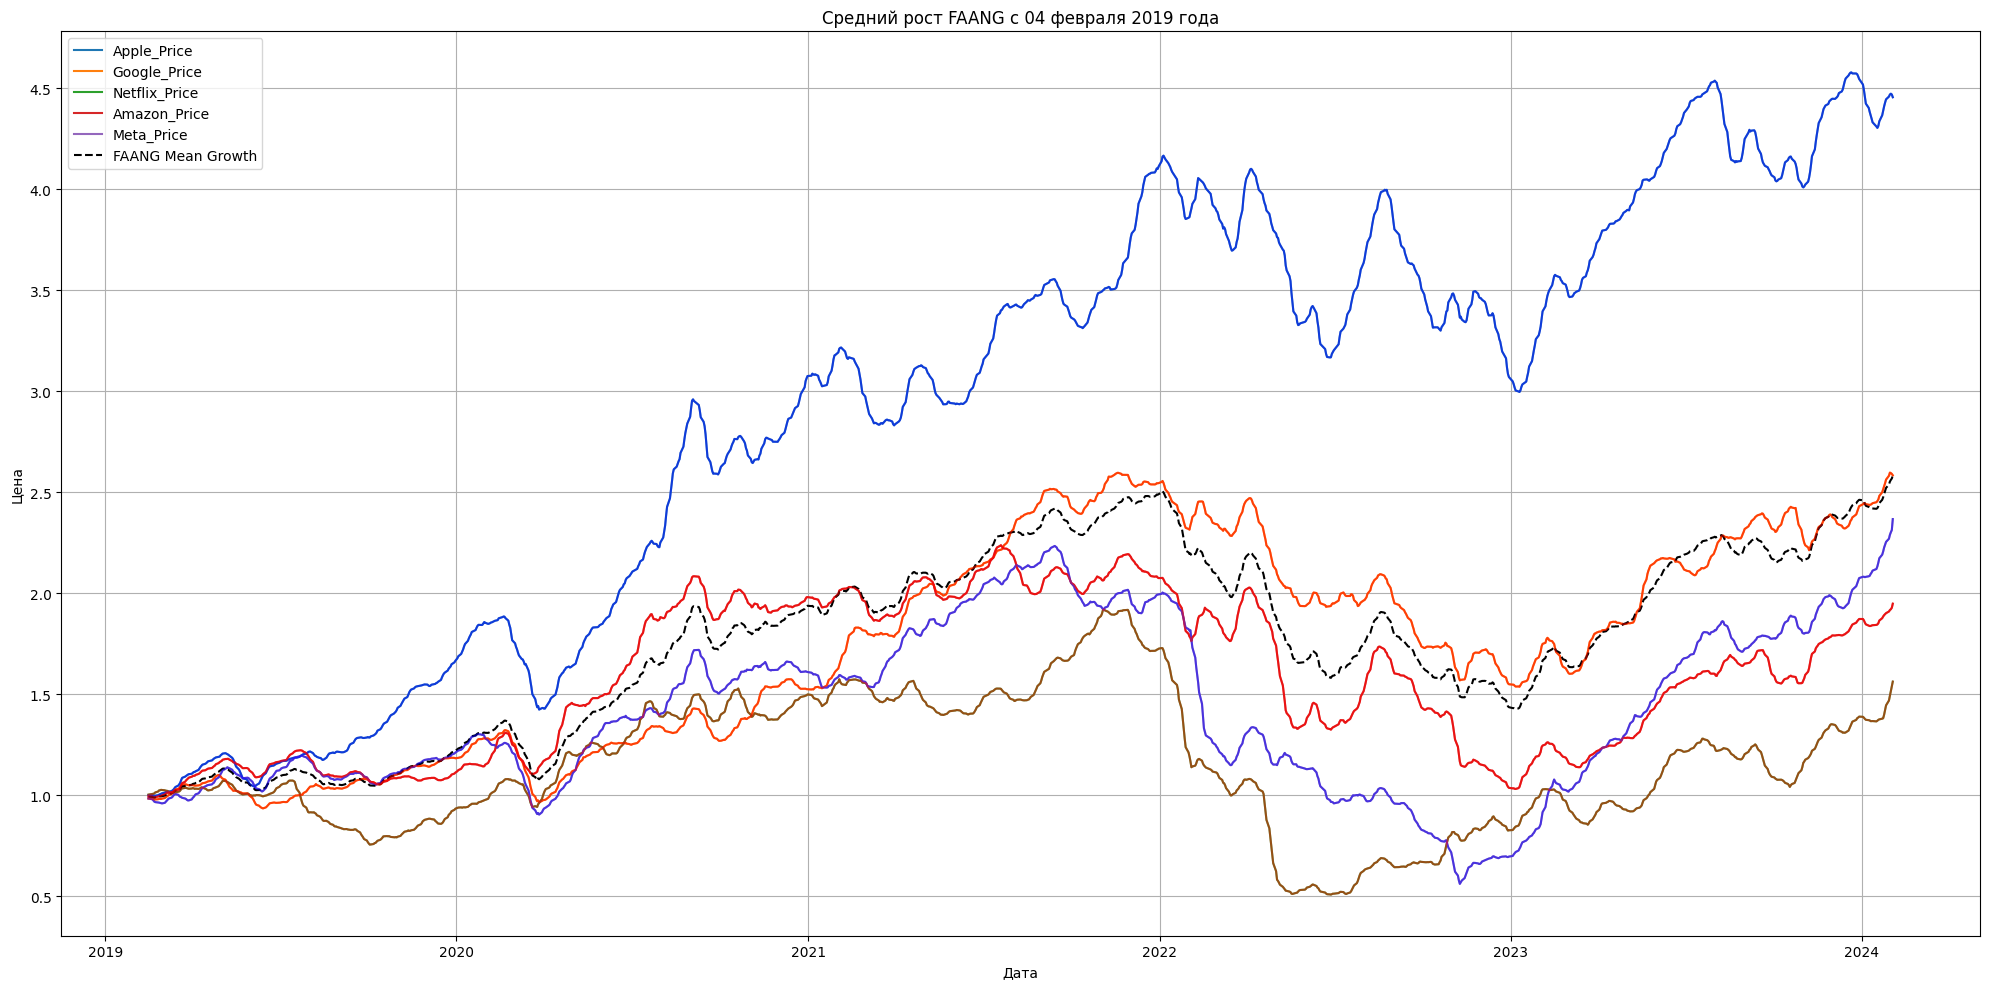

In [10]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'], dayfirst=True)
stock_market = stock_market.sort_values('Date')

faang_list = ['Apple_Price', 'Google_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price']
initial_date = stock_market['Date'].min()

initial_values = stock_market.loc[stock_market['Date'] == initial_date, faang_list]
relative_values = stock_market[faang_list].div(initial_values.iloc[0])

fig, ax = plt.subplots(figsize=(20, 10))

for company in relative_values.columns:
    if company != 'Date':
        smoothed_values = relative_values[company].rolling(window=10).mean()
        ax.plot(stock_market['Date'], smoothed_values, label=company)

faang_growth = relative_values.mean(axis=1)
smoothed_faang_growth = faang_growth.rolling(window=10).mean()
ax.plot(stock_market['Date'], smoothed_faang_growth, label='FAANG Mean Growth', linestyle='--', color='black')

above_average = relative_values.columns[relative_values.iloc[-1] > faang_growth.iloc[-1]]
below_average = relative_values.columns[relative_values.iloc[-1] < faang_growth.iloc[-1]]

for company in above_average:
    smoothed_values = relative_values[company].rolling(window=10).mean()
    ax.plot(stock_market['Date'], smoothed_values, color='blue', alpha=0.5)

for company in below_average:
    smoothed_values = relative_values[company].rolling(window=10).mean()
    ax.plot(stock_market['Date'], smoothed_values, color='red', alpha=0.5)

ax.set_title('Средний рост FAANG с 04 февраля 2019 года')
ax.set_xlabel('Дата')
ax.set_ylabel('Цена')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

### Задание 3.3 (2 балла)

Что выгоднее — инвестиции в полезные ископаемые или в крупные компании?

- Создайте линейный график с двумя линиями. Первая линия отвечает за полезные ископаемые.
- Рассчитайте стоимость всех полезных ископаемых в ценах относительно 4 февраля 2019 года. Возьмите это значение за 1, остальные цены получите как отношение к этой цене. Например, если за месяц цены выросли на 10%, то полученное значение равно 1.1.
- Подсчитайте среднее по всем полезным ископаемым по дням и добавьте получившиеся значения на график.
- Проделайте аналогичную процедуру для всех компаний в датасете. Получившийся средний рост стоимости акций добавьте на график.  

На основании полученных результатов ответьте на вопрос: во что лучше инвестировать — в полезные ископаемые или акции компаний?

In [11]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


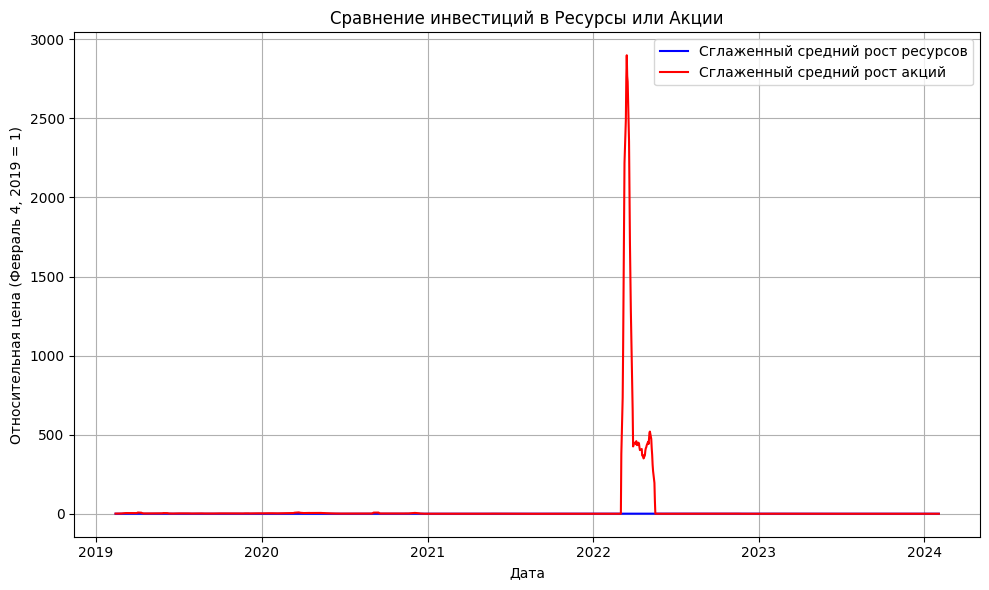

In [12]:
# Преобразование даты и сортировка
stock_market['Date'] = pd.to_datetime(stock_market['Date'], dayfirst=True)
sorted_market = stock_market.sort_values('Date')

# Преобразование числовых данных и заполнение пропущенных значений
numeric_market = sorted_market.drop(columns=['Date']).apply(pd.to_numeric, errors='coerce')
filled_market = numeric_market.ffill()

# Определение начальной даты
initial_date = filled_market.index.min()

# Вычисление относительных изменений для товаров и акций
commodities = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Silver_Price', 'Platinum_Price']
stocks = filled_market.drop(columns=commodities)
relative_commodities = filled_market[commodities].div(filled_market.loc[initial_date])
relative_stocks = stocks.div(filled_market.loc[initial_date])

# Вычисление среднего роста товаров и акций
average_commodity_growth = relative_commodities.mean(axis=1)
average_stock_growth = relative_stocks.mean(axis=1)

# Сглаживание среднего роста товаров и акций
smoothed_commodity_growth = average_commodity_growth.rolling(window=8).mean()
smoothed_stock_growth = average_stock_growth.rolling(window=8).mean()

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(sorted_market['Date'], smoothed_commodity_growth, label='Сглаженный средний рост ресурсов', color='blue')
plt.plot(sorted_market['Date'], smoothed_stock_growth, label='Сглаженный средний рост акций', color='red')
plt.title('Сравнение инвестиций в Ресурсы или Акции')
plt.xlabel('Дата')
plt.ylabel('Относительная цена (Февраль 4, 2019 = 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Таким образом, на основании этих данных, можно сделать вывод, что инвестирование в акции этих компаний может быть выгодным. Однако стоит помнить, что важно не только вложить деньги в акции, но и вовремя выйти из них. Рынок постоянно меняется, и то, что сегодня приносит прибыль, завтра может стать убыточным. Поэтому всегда важно следить за динамикой рынка и быть готовым к изменениям. Инвестиции требуют не только знаний, но и стратегии, а также готовности к риску. Стоит помнить, что важно не только зарабатывать, но и сохранять свои инвестиции.

# Задание 4 (4 балла)

Попробуем использовать разные подходы для реализации одной задачи — визуализации волатильности акций разных компаний.

### Задание 4.1 (2 балла)
С помощью библиотек matplotlib и seaborn создайте поле (plt.subplots()), в котором на графиках для каждой компании будет изображена динамика роста стоимости акций. Отметьте зеленым все компании, стоимость акций которых была в два раза выше на начало 2024 года в сравнении с ценой в начале 2019 года.

In [13]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


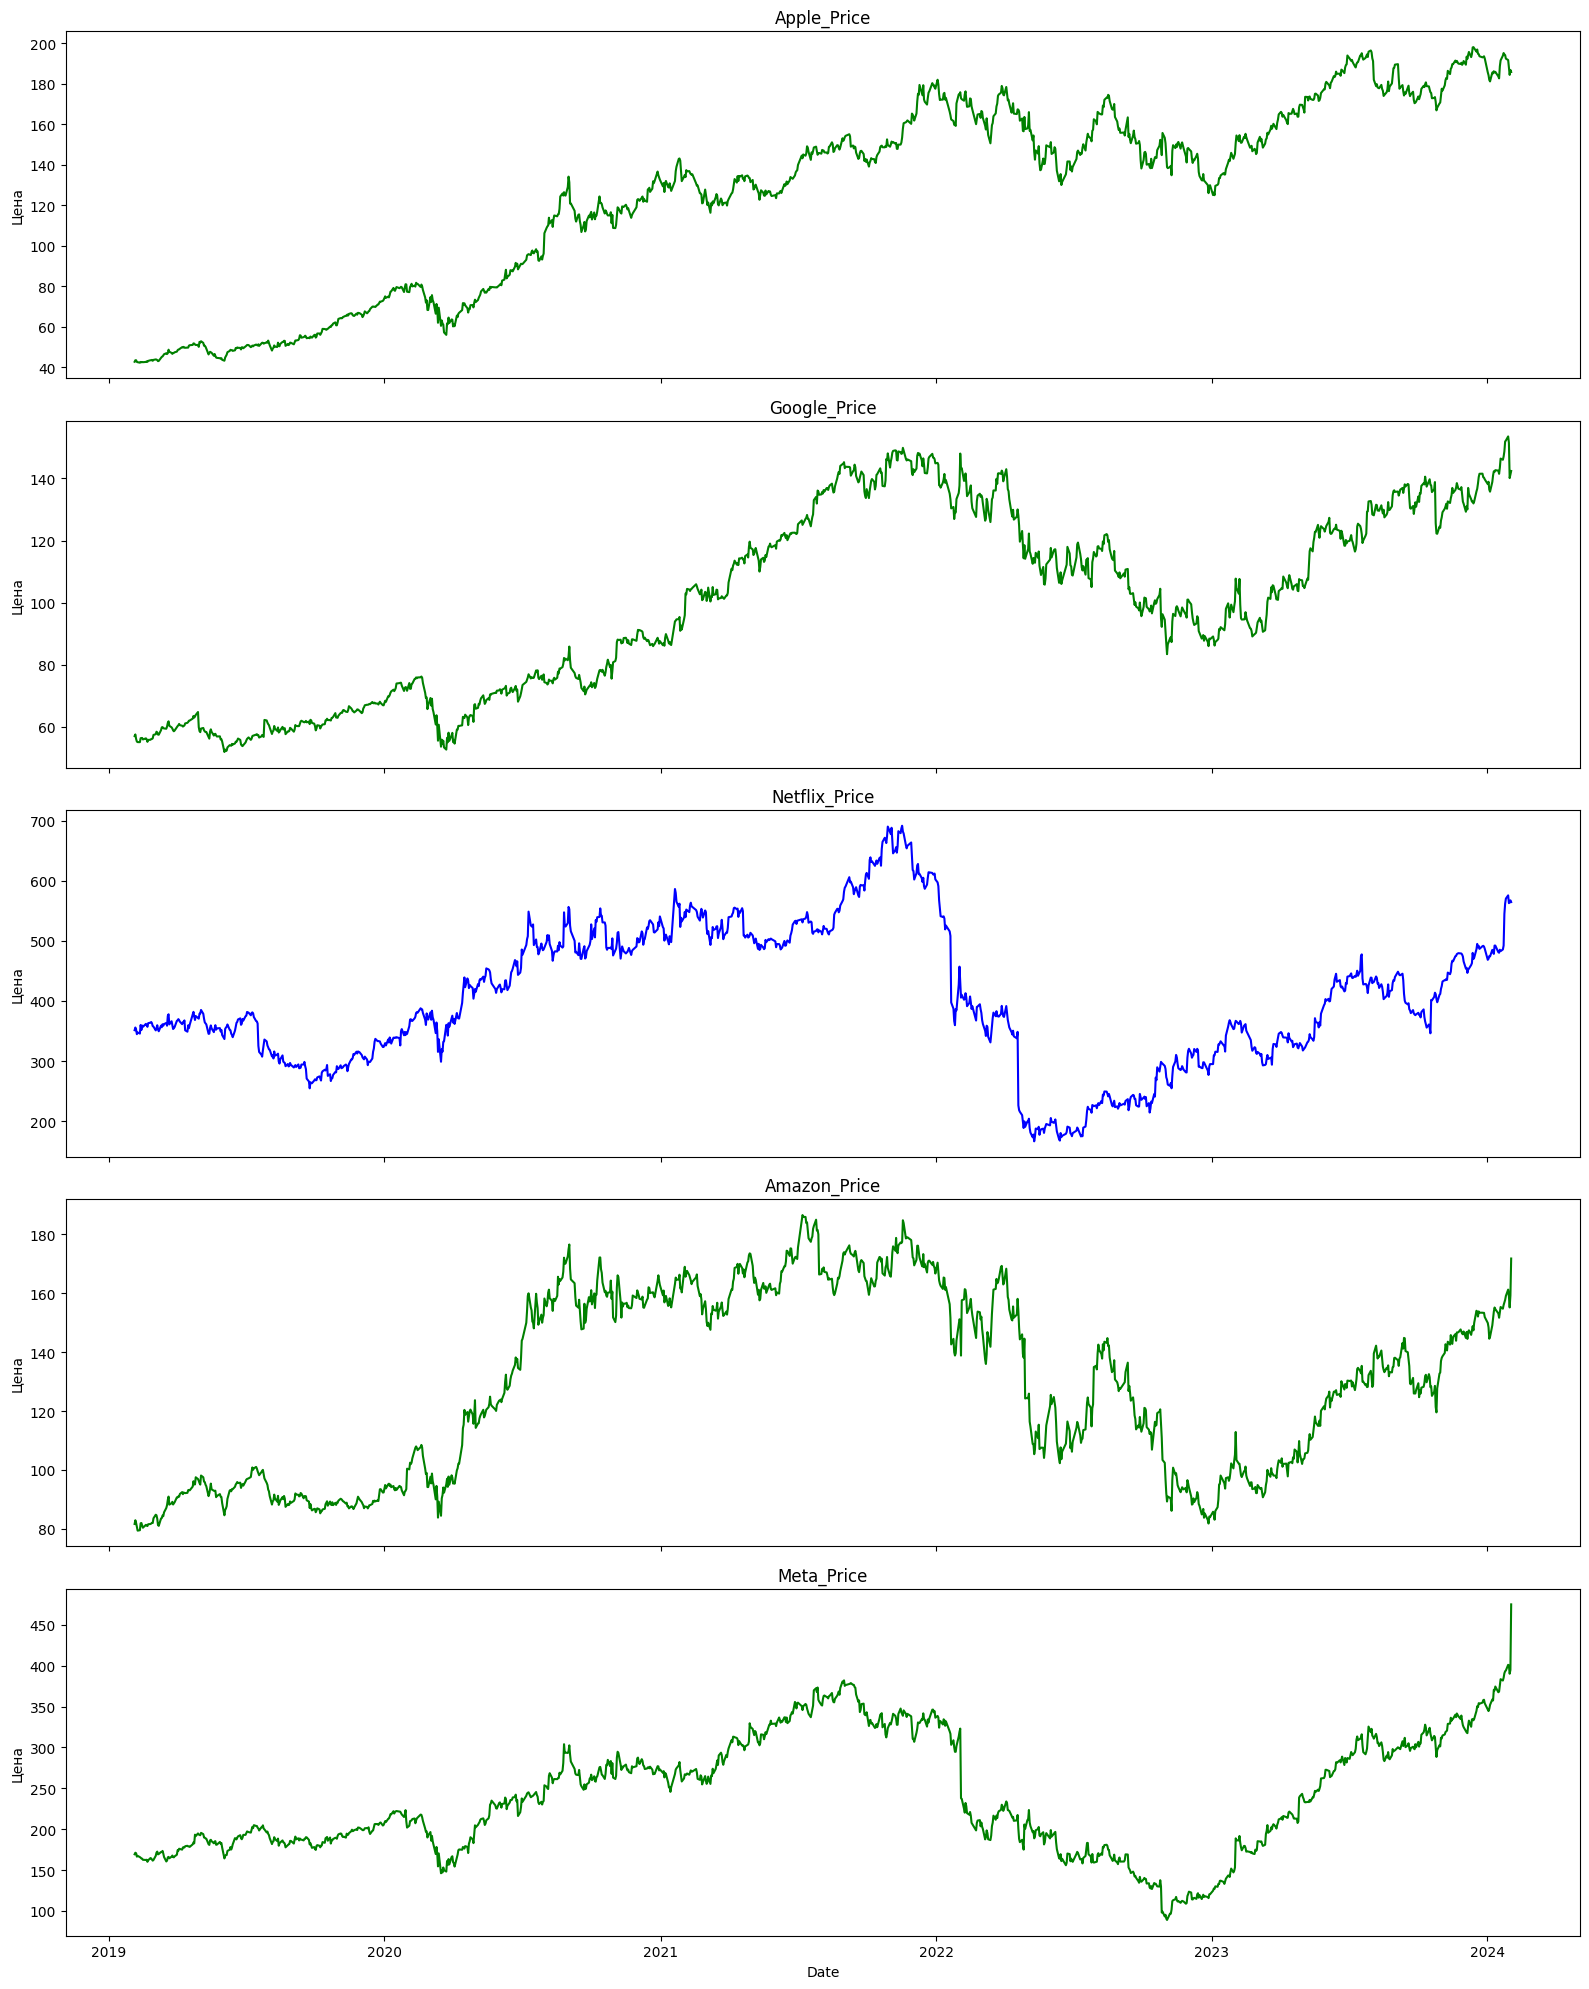

In [14]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'], dayfirst=True)
sorted_market = stock_market.sort_values('Date')

faang_list = ['Apple_Price', 'Google_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price']

fig, axs = plt.subplots(len(faang_list), 1, figsize=(16, 20), sharex=True)

for i, company in enumerate(faang_list):    
    # Преобразование столбца цены акций в числовой формат
    if sorted_market[company].dtype == object:
        sorted_market[company] = sorted_market[company].str.replace(',', '').replace('', float('nan')).astype(float)
    
    # Вычисление относительного изменения цены акций
    start_price = sorted_market.loc[sorted_market['Date'] == '2019-01-01', company].values
    end_price = sorted_market.loc[sorted_market['Date'] == '2024-01-01', company].values
    price_ratio = end_price[0] / start_price[0] if start_price.size > 0 and end_price.size > 0 else sorted_market[company].iloc[-1] / sorted_market[company].iloc[0]
    
    # Определение цвета линии
    line_color = 'green' if price_ratio >= 2 else 'blue'
    
    sns.lineplot(data=sorted_market, x='Date', y=company, ax=axs[i], color=line_color)
    axs[i].set_title(company)
    axs[i].set_ylabel('Цена')

plt.tight_layout()
plt.show()


### Задание 4.2 (2 балла)
С помощью библиотеки plotly создайте lineplot, в котором будет изображена динамика акций компаний за период с 2019 по 2024 гг. Добавьте на график кнопки для каждой компании, нажав на которые можно переключиться между визуализациями динамики изменения стоимости акций для разных компаний. Добавьте название и подписи к осям каждого графика.

In [15]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [16]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'], format='%d-%m-%Y')
fig = go.Figure()

faang_list = ['Apple_Price', 'Google_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price']

for company in faang_list:
    fig.add_trace(go.Scatter(x=stock_market['Date'], y=stock_market[company], mode='lines', name=company))

fig.update_layout(title_text='Стоимости акций компаний (2019-2024)', xaxis_title_text='Дата', yaxis_title_text='Стоимость', template='seaborn')

menu_buttons = []
for company in faang_list:
    menu_buttons.append(dict(method='update', label=company, args=[{'visible': [company == company for company in faang_list]}, {'title': f'Изменение стоимости акций {company} (2019-2024)'}]))

fig.update_layout(updatemenus=[dict(buttons=menu_buttons)])
fig.show()

# Задание 5 (2 балла)  

- Напишите функцию, которая будет принимать на вход название компании, с помощью этого названия строить scatter plot с зависимостью цены (Price) акций от оборота (Volume) компании.
- На каждый scatter plot добавьте линию линейной регрессии, которая будет показывать получившуюся зависимость. Получившуюся линию покрасьте в красный цвет.
- Также на scatter plot добавьте текст с получившимся уравнением (вида  ).
- Постройте поле (plt.subplots()), в котором будут изображены диаграммы рассеяния для всех компаний, присутствующих в датасете (используйте метод .pipe()). Каждая диаграмма рассеяния должна представлять собой зависимость цен на акции от выручки, иметь линию регрессии, а также текст с регрессионным уравнением для конкретной компании.

In [17]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [20]:
from scipy import stats

def draw_scatter_and_regression(ax, dataframe, stock):
    price_col = f'{stock}_Price'
    volume_col = f'{stock}_Vol.'

    dataframe[price_col] = pd.to_numeric(dataframe[price_col].replace(',', '', regex=True), errors='coerce')
    dataframe[volume_col] = pd.to_numeric(dataframe[volume_col].replace(',', '', regex=True), errors='coerce')
    data_subset = dataframe[[price_col, volume_col]].dropna()

    regression_params = stats.linregress(data_subset[volume_col], data_subset[price_col])
    slope, intercept = regression_params.slope, regression_params.intercept
    
    ax.scatter(data_subset[volume_col], data_subset[price_col], label=f'{stock} акция и объем')
    regression_line = slope * data_subset[volume_col] + intercept
    ax.plot(data_subset[volume_col], regression_line, color='red', label=f'y={slope:.2f}x+{intercept:.2f}')
    ax.legend()
    ax.set_title(f'Цена акции {stock} и её объем')
    ax.set_xlabel('Объем')
    ax.set_ylabel('Стоимость')


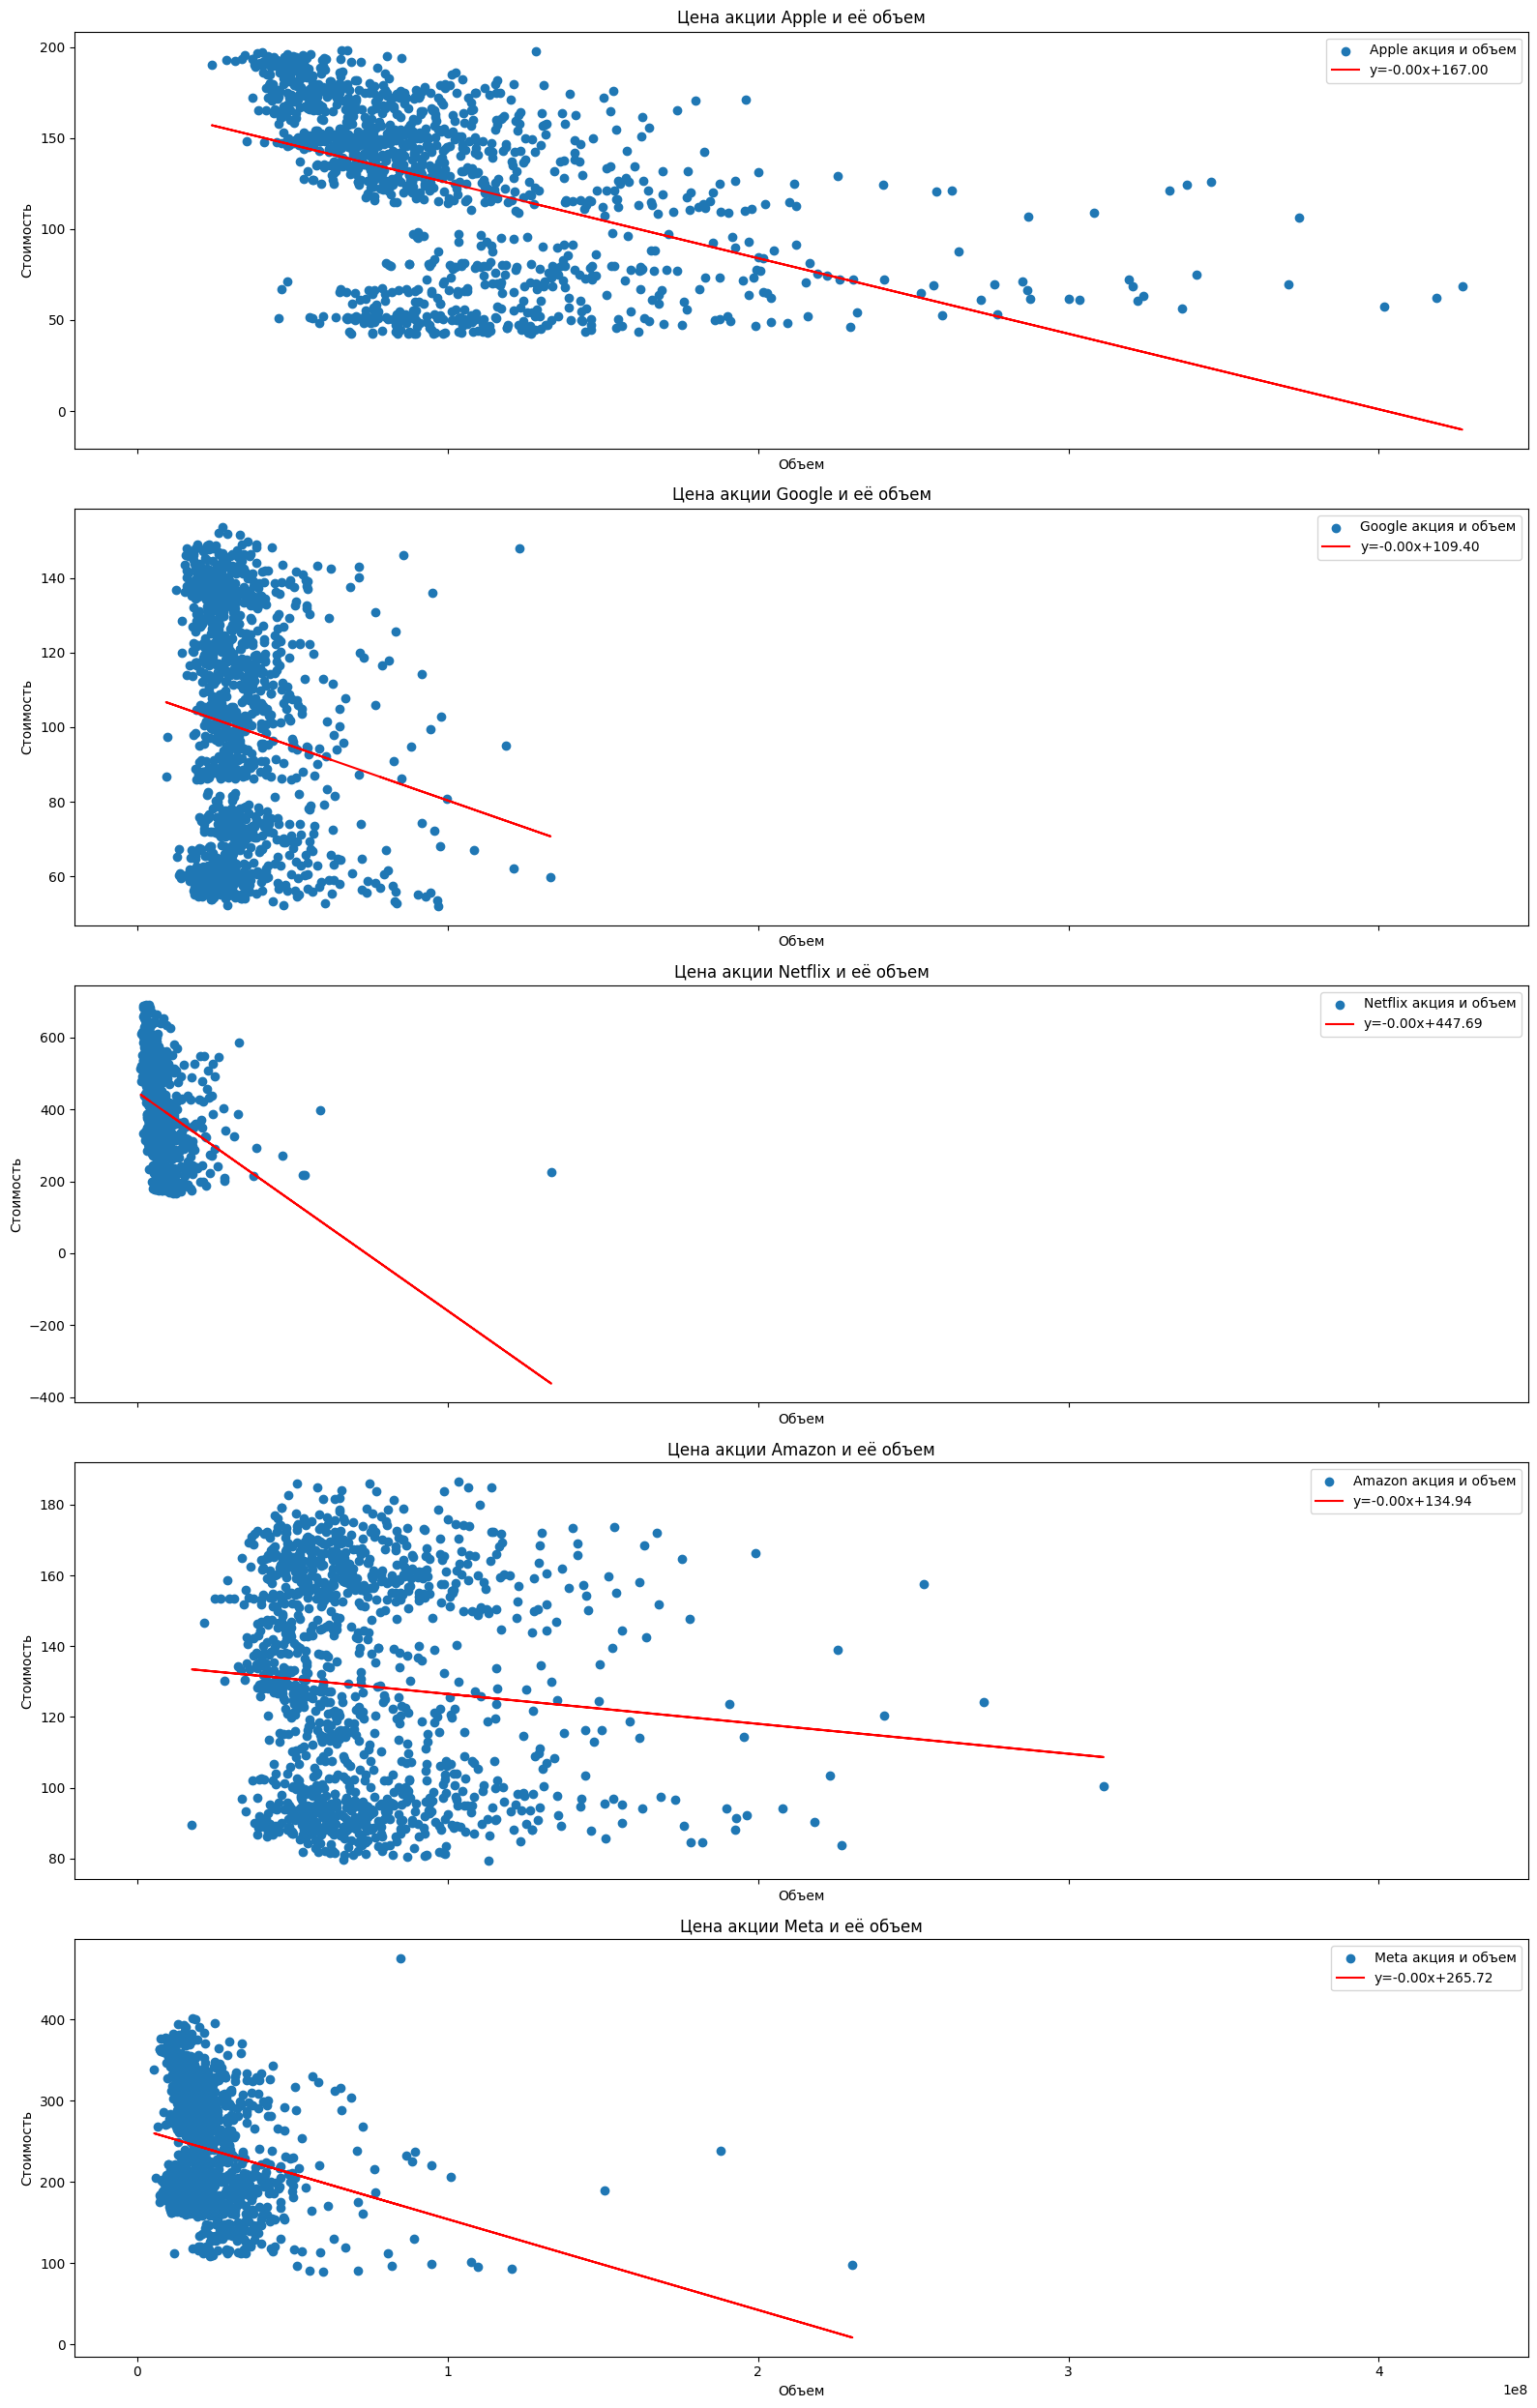

In [21]:
faang_names = ['Apple', 'Google', 'Netflix', 'Amazon', 'Meta']

fig, axes = plt.subplots(len(faang_names), 1, figsize=(16, 25), sharex=True)

for i, company in enumerate(faang_names):
    draw_scatter_and_regression(axes[i], stock_market, company)

plt.tight_layout()
plt.show()